In [12]:
import os
import pandas as pd

def get_parquet_files(root_folder):
    parquet_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".parquet"):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

root_folder = '../test/'
parquet_files = get_parquet_files(root_folder)
print(parquet_files)
df = pd.concat([pd.read_parquet(parquet_file) for parquet_file in parquet_files])

df.head()

['../test/order_datetime=2021-10-19/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2022-09-01/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-08-12/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-10-26/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2021-08-15/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2022-09-06/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-10-21/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2022-09-30/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-08-23/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-10-28/part-00003-b265e002

,user_id,merchant_abn,dollar_value,order_id
0,14938,19933438190,28.197762,9ac44c8f-815e-4a5d-817c-74ac53327afa
1,1,80324045558,19.917432,2c7b1606-d9f1-4eac-99f8-97abc979ab41
2,14938,50315283629,88.556866,18507390-268c-4dee-8d19-22c4cdf72b58
3,1,62170730910,100.929076,4fe7b08f-72bd-42fb-b2ae-407c3249de55
4,14938,20527255332,205.822861,d1c2a45c-c0e2-4d25-9054-36c945b9a225


In [137]:
merchants = pd.read_parquet('../data/raw/tbl_merchants.parquet')
merchants.reset_index(inplace=True)
merchants.head()
print(merchants.columns)

Index(['merchant_abn', 'name', 'tags'], dtype='object')


In [64]:
consumers = pd.read_parquet('../data/raw/consumer_user_details.parquet')
consumers.head()

,user_id,consumer_id
0,1,1195503
1,2,179208
2,3,1194530
3,4,154128
4,5,712975


In [138]:
import pandas as pd

def split_tags(tag):
    if isinstance(tag, str):
        tag = tag.replace('(', '[').replace(')', ']')
        parts = tag.split('], [')
        
        parts = [p.strip('[]') for p in parts]
        
        if len(parts) == 3:
            category = parts[0].strip()
            revenue_rate = parts[1].strip()
            take_rate = parts[2].strip()
            return category, revenue_rate, take_rate
    return None, None, None

merchants[['category', 'revenue_rate', 'take_rate']] = merchants['tags'].apply(lambda x: pd.Series(split_tags(x)))

merchants.drop(columns=['tags'], inplace=True)

print(merchants.head())
# Print the column names of the merchants DataFrame
print(merchants.columns)


   merchant_abn                                  name  \
0   10023283211                         Felis Limited   
1   10142254217              Arcu Ac Orci Corporation   
2   10165489824                      Nunc Sed Company   
3   10187291046  Ultricies Dignissim Lacus Foundation   
4   10192359162                   Enim Condimentum PC   

                                            category revenue_rate  \
0  furniture, home furnishings and equipment shop...            e   
1  cable, satellite, and otHer pay television and...            b   
2        jewelry, watch, clock, and silverware shops            b   
3             wAtch, clock, and jewelry repair shops            b   
4  music shops - musical instruments, pianos, and...            a   

         take_rate  
0  take rate: 0.18  
1  take rate: 4.22  
2  take rate: 4.40  
3  take rate: 3.29  
4  take rate: 6.33  
Index(['merchant_abn', 'name', 'category', 'revenue_rate', 'take_rate'], dtype='object')


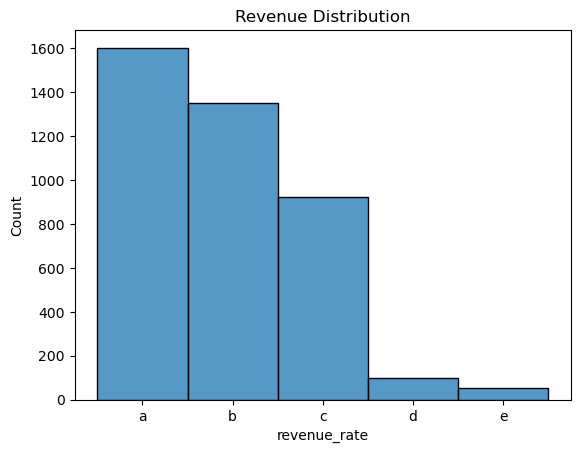

name            0
category        0
revenue_rate    0
take_rate       0
dtype: int64
user_id         0
merchant_abn    0
dollar_value    0
order_id        0
dtype: int64
user_id        0
consumer_id    0
dtype: int64


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merchants_sorted = merchants.sort_values('revenue_rate')
sns.histplot(merchants_sorted['revenue_rate'], bins=20)
plt.title('Revenue Distribution')
plt.show()

print(merchants.isnull().sum())
print(df.isnull().sum())
print(consumers.isnull().sum())

In [139]:
merged_merchants = merchants.merge(merchant_fraud, on='merchant_abn', how='left')

print(merged_merchants.head())

   merchant_abn                                  name  \
0   10023283211                         Felis Limited   
1   10142254217              Arcu Ac Orci Corporation   
2   10165489824                      Nunc Sed Company   
3   10187291046  Ultricies Dignissim Lacus Foundation   
4   10192359162                   Enim Condimentum PC   

                                            category revenue_rate  \
0  furniture, home furnishings and equipment shop...            e   
1  cable, satellite, and otHer pay television and...            b   
2        jewelry, watch, clock, and silverware shops            b   
3             wAtch, clock, and jewelry repair shops            b   
4  music shops - musical instruments, pianos, and...            a   

         take_rate order_datetime  fraud_probability  
0  take rate: 0.18            NaN                NaN  
1  take rate: 4.22            NaN                NaN  
2  take rate: 4.40            NaN                NaN  
3  take rate: 3.29    

In [140]:
null_counts = merged_merchants.isnull().sum()
non_null_counts = merged_merchants.notnull().sum()

print("Null Count:")
print(null_counts)
print("\nNon-Null Count:")
print(non_null_counts)

Null Count:
merchant_abn            0
name                    0
category                0
revenue_rate            0
take_rate               0
order_datetime       3978
fraud_probability    3978
dtype: int64

Non-Null Count:
merchant_abn         4073
name                 4073
category             4073
revenue_rate         4073
take_rate            4073
order_datetime         95
fraud_probability      95
dtype: int64


In [109]:
import pandas as pd

tbl_consumer = pd.read_csv('../data/raw/tbl_consumer.csv')

tbl_consumer[['name', 'address', 'state', 'postcode', 'gender', 'consumer_id']] = tbl_consumer['name|address|state|postcode|gender|consumer_id'].str.split('|', expand=True)

tbl_consumer.drop(columns=['name|address|state|postcode|gender|consumer_id'], inplace=True)

tbl_consumer['consumer_id'] = tbl_consumer['consumer_id'].astype(str)
consumers['consumer_id'] = consumers['consumer_id'].astype(str)

merged_consumer = consumers.merge(tbl_consumer, on='consumer_id', how='left')

consumer_user_details = pd.read_parquet('../data/raw/consumer_user_details.parquet')

consumer_user_details['consumer_id'] = consumer_user_details['consumer_id'].astype(str)

merged_consumer = merged_consumer.merge(consumer_user_details, on='consumer_id', how='left')

consumer_fraud = pd.read_csv('../data/raw/consumer_fraud_probability.csv')

merged_consumer = merged_consumer.merge(consumer_fraud, left_on='user_id_x', right_on='user_id', how='left')

merged_consumer.drop(columns=['user_id_y', 'user_id_x'], inplace=True)

print(merged_consumer.head(30))

   consumer_id                   name                        address state  \
0      1195503       Yolanda Williams     413 Haney Gardens Apt. 742    WA   
1       179208             Mary Smith                3764 Amber Oval   NSW   
2       179208             Mary Smith                3764 Amber Oval   NSW   
3      1194530          Jill Jones MD             40693 Henry Greens    NT   
4       154128        Lindsay Jimenez      00653 Davenport Crossroad   NSW   
5       712975      Rebecca Blanchard  9271 Michael Manors Suite 651    WA   
6       712975      Rebecca Blanchard  9271 Michael Manors Suite 651    WA   
7       712975      Rebecca Blanchard  9271 Michael Manors Suite 651    WA   
8       407340          Karen Chapman    2706 Stewart Oval Suite 588   NSW   
9       511685           Andrea Jones              122 Brandon Cliff   QLD   
10      448088       Stephen Williams    6804 Wright Crest Suite 311    WA   
11      650435        Stephanie Reyes     5813 Denise Land Suite